In [10]:
import pandas as pd
import matplotlib.pyplot as plot

f = 'SBAnational.csv'

df = pd.read_csv(f)

no_cols = len(df.columns)

no_rows = len(df)

print ('Number of rows: %s' %(no_rows))

print ('Number of columns: %s' %(no_cols))

print ('Data types for columns are:')

df.dtypes

Number of rows: 899164
Number of columns: 27
Data types for columns are:


LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

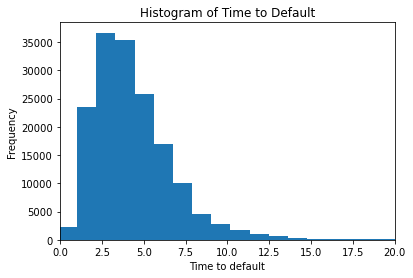

Average time to default in years: 4.326845
Standard dev time to default in years: 2.450621


In [11]:
df1 = df.dropna(axis = 0, how = 'any', subset = ['ChgOffDate'])

df1 = df1.copy()

df1['ChgOffDate'] = pd.to_datetime(df1['ChgOffDate'], format = '%d-%b-%y')

df1['DisbursementDate'] = pd.to_datetime(df1['DisbursementDate'], format = '%d-%b-%y')

df1['TimeDefault_days'] = (df1['ChgOffDate'] - df1['DisbursementDate']).dt.days

df1['TimeDefault_years'] = df1['TimeDefault_days'] / 365

plot.hist(df1['TimeDefault_years'], bins = 100)
plot.title('Histogram of Time to Default')
plot.xlim(0, 20)
plot.xlabel('Time to default')
plot.ylabel('Frequency')

plot.show()

df1_mean = df1['TimeDefault_years'].mean()

df1_std = df1['TimeDefault_years'].std()

print ('Average time to default in years: %f' %(df1_mean))

print ('Standard dev time to default in years: %f' %(df1_std))
